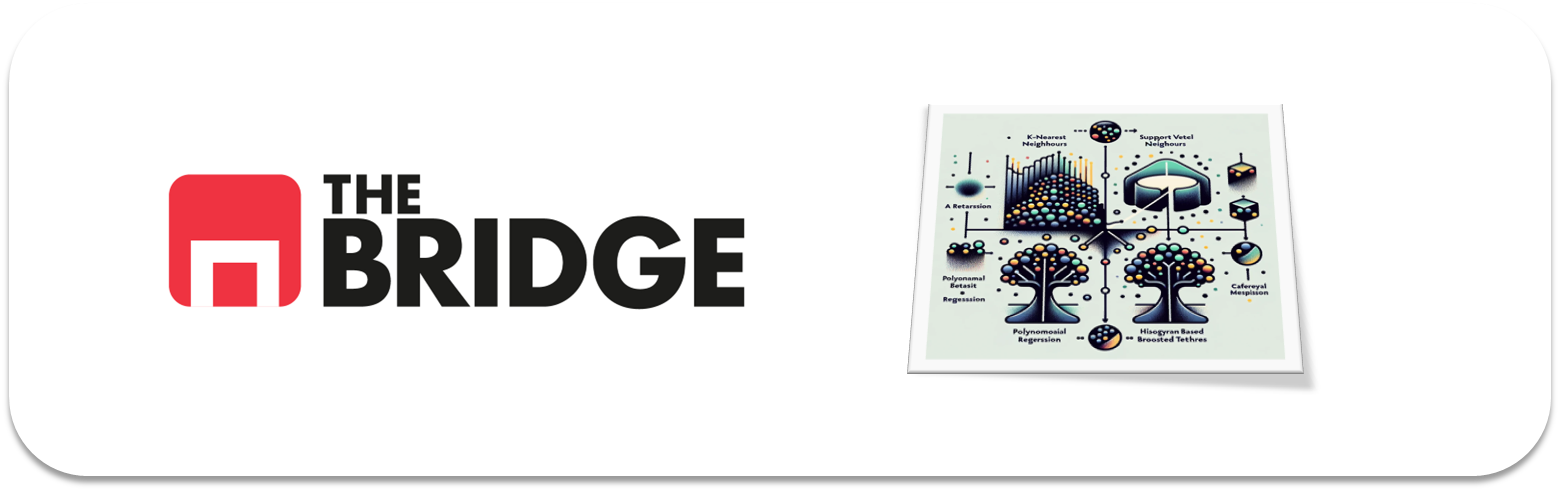

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [42]:
import bootcampviztools as bt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.copy_on_write = True

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [6]:
df = pd.read_csv("./data/credit_npo.csv")

In [8]:
df.sample(15)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1555,0,0.099361,52,0,0.015518,6250.0,8,0,0,0,3.0
10248,0,1.000000,40,0,0.455155,8350.0,7,0,2,0,1.0
2485,0,0.447106,29,0,0.219357,3450.0,4,0,0,0,2.0
11041,0,0.000000,73,0,0.000000,NaN,6,0,0,0,0.0
3252,0,0.153784,40,1,1.004284,3500.0,8,0,1,0,0.0
7728,0,1.000000,63,0,0.465383,1920.0,1,0,1,0,0.0
6748,0,0.473648,42,0,0.507479,2673.0,3,0,1,0,3.0
6290,0,0.113849,74,0,0.306013,7100.0,8,0,1,0,1.0
7936,0,0.330546,45,0,0.397016,6500.0,8,0,1,0,1.0
4348,0,0.481481,53,0,0.004965,4833.0,2,0,0,0,0.0


In [10]:
df["SeriousDlqin2yrs"].value_counts()

SeriousDlqin2yrs
0    11673
1      864
Name: count, dtype: int64

In [11]:
df["RevolvingUtilizationOfUnsecuredLines"].value_counts()

RevolvingUtilizationOfUnsecuredLines
0.000000    878
1.000000    875
0.035839      2
0.953488      2
1.086379      2
           ... 
0.860370      1
0.245543      1
0.068484      1
0.161741      1
0.116165      1
Name: count, Length: 10764, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

#### Descripción de variables

- SeriousDlqin2yrs -> Indica si la persona tuvo un impago grave en los últimos 2 años

- RevolvingUtilizationOfUnsecuredLines -> Qué porcentaje del crédito disponible (tarjetas, líneas de crédito sin garantía) está usando actualmente la persona. 0 no esta usando nada de su crédito en cambio entre más cerca al 1 esta gastando más crédito

-  age -> edad del solicitante

- NumberOfTime30-59DaysPastDueNotWorse -> Número de veces que la persona estuvo entre 30 y 59 días atrasada en un pago

- DebtRatio -> qué parte del ingreso mensual de una persona está comprometido en pagos de deuda y gastos financieros.

- MonthlyIncome -> Ingreso mensual declarado

- NumberOfOpenCreditLinesAndLoans -> Número total de líneas de crédito y préstamos abiertos

- NumberOfTimes90DaysLate ->  Número de veces que la persona estuvo 90 días o más atrasada en un pago

- NumberRealEstateLoansOrLines -> Número de préstamos o líneas de crédito relacionados con bienes raíces (hipotecas, etc.).

- NumberOfTime60-89DaysPastDueNotWorse -> Número de veces que la persona estuvo entre 60 y 89 días atrasada en un pago

- NumberOfDependents -> - Número de dependientes económicos (hijos u otras personas a cargo)


Por qué en ML tratamos la edad como continua
Porque los modelos entienden relaciones numéricas:
- 20 está cerca de 21
- 40 está lejos de 20
- 60 es mayor que 30
Y pueden aprender patrones como:
“El riesgo baja hasta los 50 y luego sube.”
Eso solo es posible si la edad se trata como número continuo.


In [14]:
continuas = []
discretas = []
categ_binarias = []

for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        # Si tiene pocos valores únicos → probablemente es discreta
        if df[col].nunique() < 20:
            # Si solo tiene 0 y 1 → es categórica binaria
            if set(df[col].unique()) <= {0, 1}:
                categ_binarias.append(col)
            else:
                discretas.append(col)
        else:
            continuas.append(col)

print("Numéricas continuas:", continuas)
print("Numéricas discretas:", discretas)
print("Categóricas binarias:", categ_binarias)

Numéricas continuas: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans']
Numéricas discretas: ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']
Categóricas binarias: ['SeriousDlqin2yrs']


### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Estamos tratando con un problema de clasificación en donde nuestra variable target es  SeriousDlqin2yrs

### #1.3
Pinta la distribución de frecuencias del target y coméntala

In [16]:
target = "SeriousDlqin2yrs"

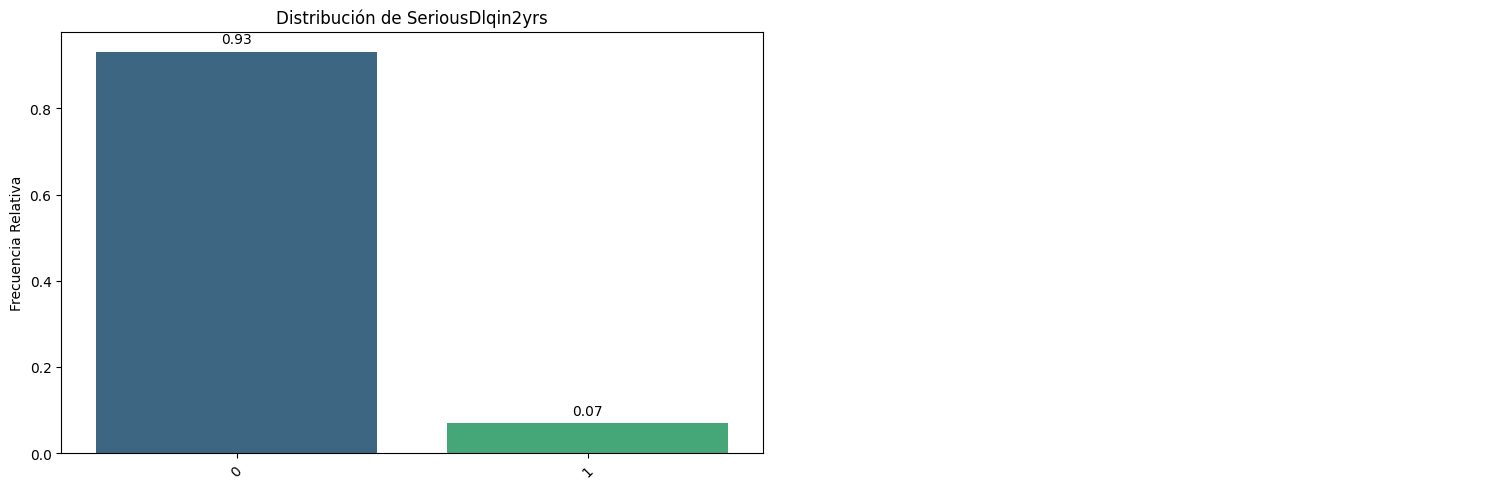

In [17]:
bt.pinta_distribucion_categoricas(df, [target], mostrar_valores= True, relativa= True)

Como se encuntra desbalanceada tendremos que aplicar alguna técnica de balanceo para que el modelo generalice mejor.

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

#### Train-Test split

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [21]:
y.value_counts(normalize = True)

SeriousDlqin2yrs
0    0.931084
1    0.068916
Name: proportion, dtype: float64

#### Imputar nulos

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [26]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,11816.000000,12537.000000,12537.000000,12537.000000,12537.000000,12360.000000
mean,0.068916,0.330359,52.079445,0.409588,1.902253,6864.815420,8.482332,0.259312,0.999202,0.228364,0.822087
std,0.253321,0.368148,15.077498,4.055787,9.122216,11855.905437,5.165422,4.035658,1.134325,4.018873,1.136802
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030651,41.000000,0.000000,0.142268,3498.750000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.163490,51.000000,0.000000,0.302025,5416.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.582219,62.000000,0.000000,0.506725,8300.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,6.000000,101.000000,98.000000,99.000000,702500.000000,49.000000,98.000000,19.000000,98.000000,10.000000


In [ ]:
# Número de nulos por columna
nulos_abs = df.isnull().sum()

# Porcentaje de nulos por columna
nulos_pct = (df.isnull().mean() * 100).round(2)

# tabla
tabla_nulos = pd.DataFrame({
    'Nulos': nulos_abs,
    'Porcentaje (%)': nulos_pct
})

tabla_nulos

,Nulos,Porcentaje (%)
SeriousDlqin2yrs,0,0.00
RevolvingUtilizationOfUnsecuredLines,0,0.00
age,0,0.00
NumberOfTime30-59DaysPastDueNotWorse,0,0.00
DebtRatio,0,0.00
MonthlyIncome,721,5.75
NumberOfOpenCreditLinesAndLoans,0,0.00
NumberOfTimes90DaysLate,0,0.00
NumberRealEstateLoansOrLines,0,0.00
NumberOfTime60-89DaysPastDueNotWorse,0,0.00


In [32]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

In [36]:
X_train_imp_df = pd.DataFrame(X_train_imp, columns=X_train.columns)
X_train_imp_df[target] = y_train.values

#### Mini-EDA

In [33]:
features_num = df.columns.to_list()
features_num.remove(target)

In [34]:
features_num

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

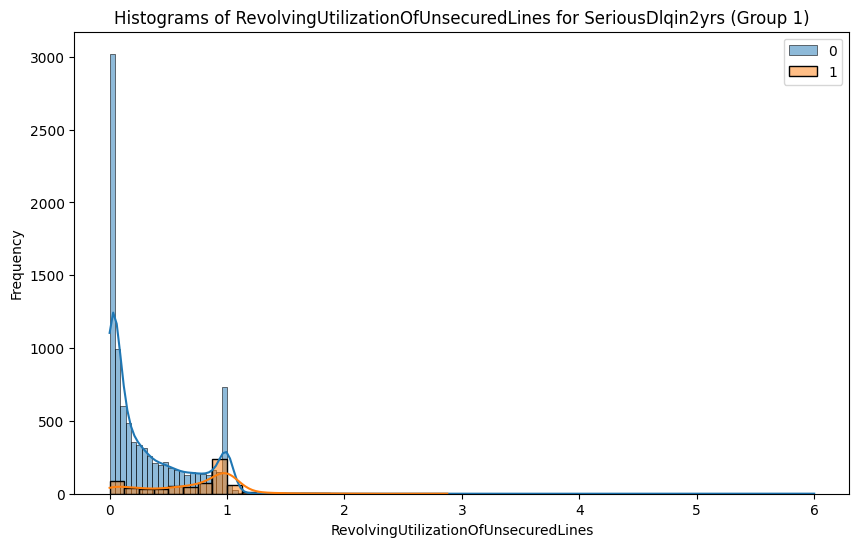

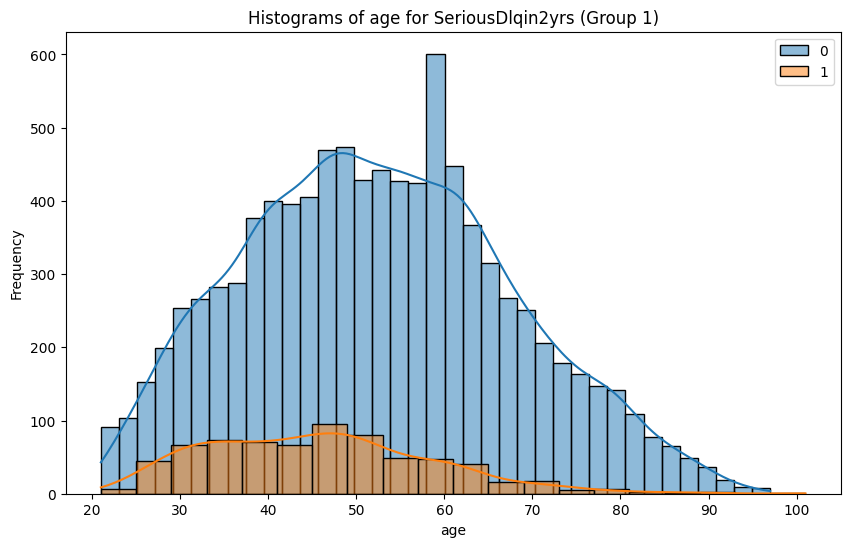

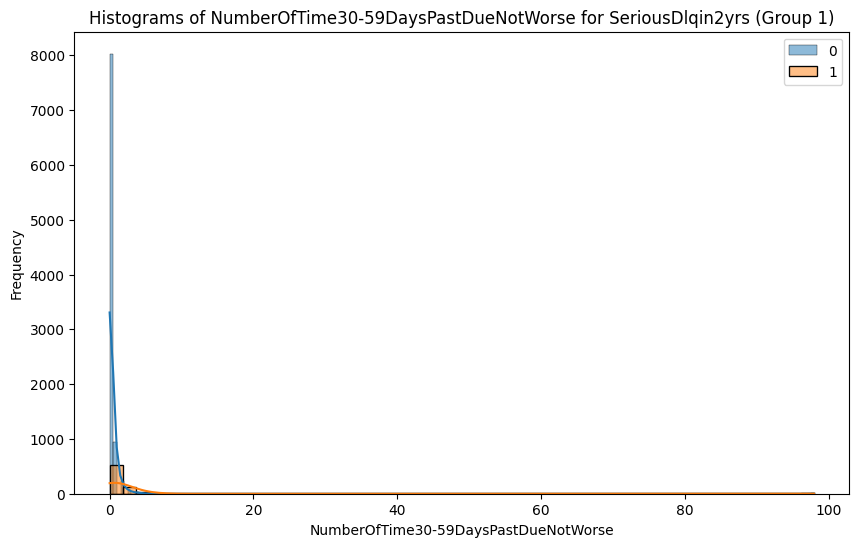

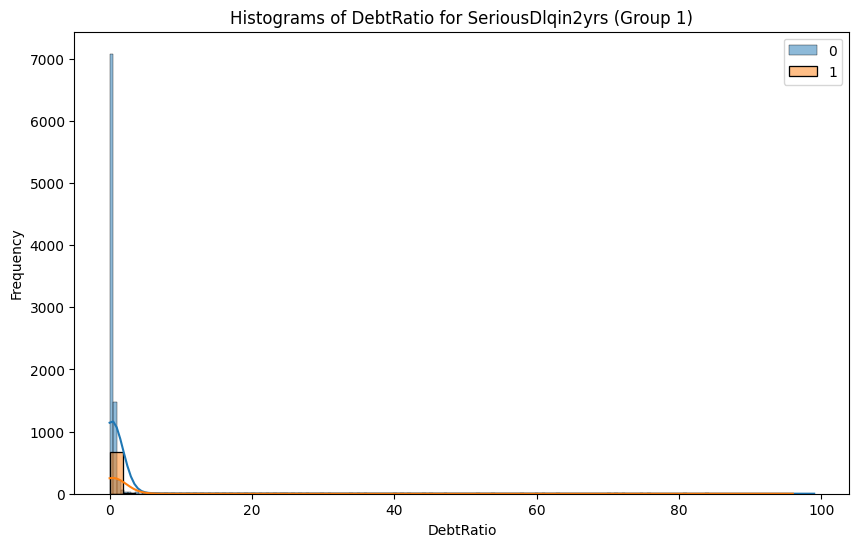

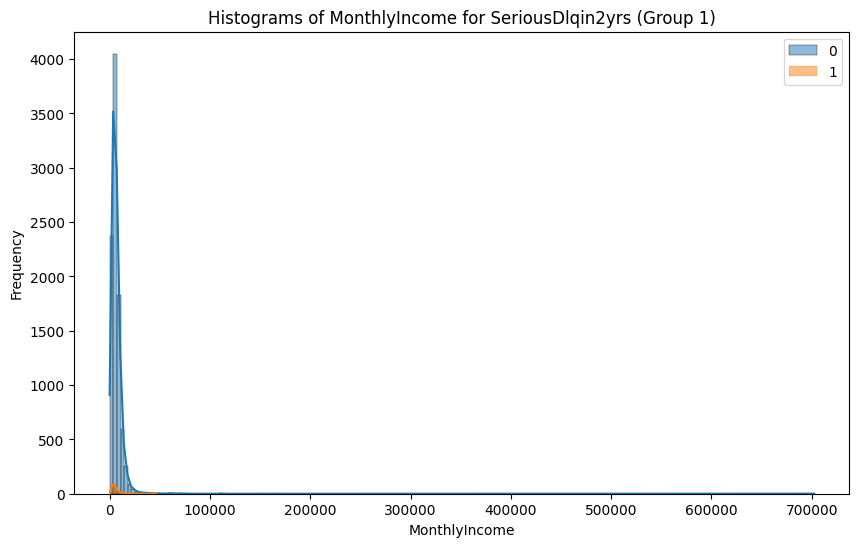

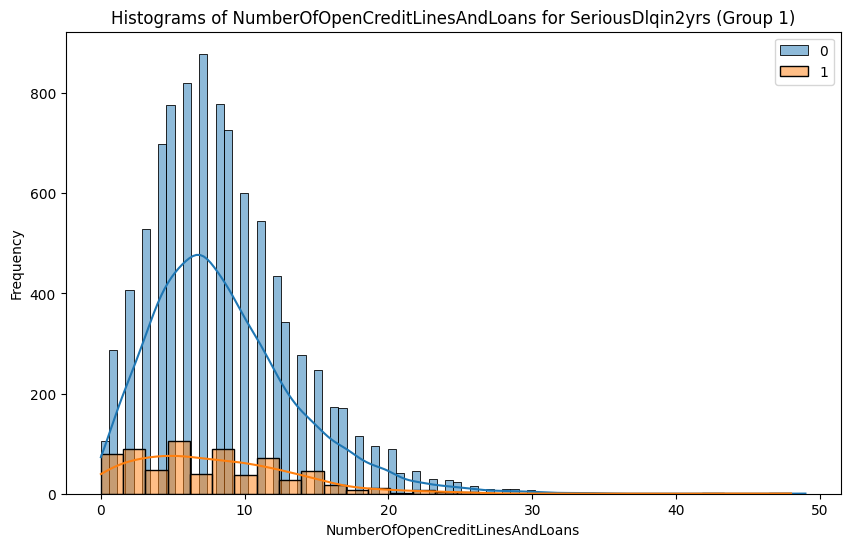

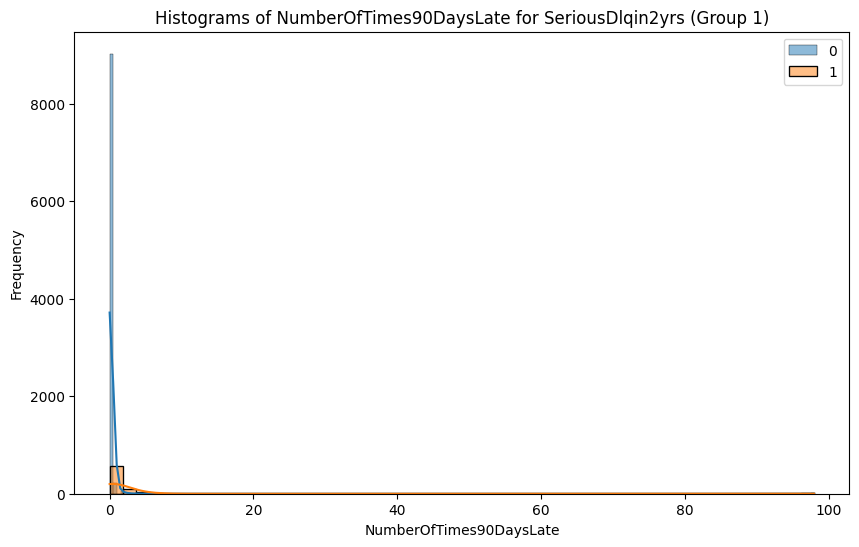

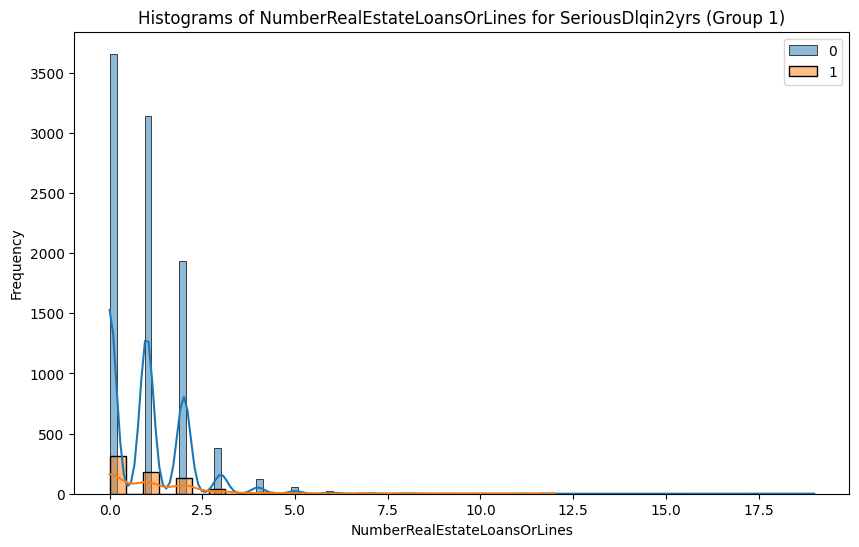

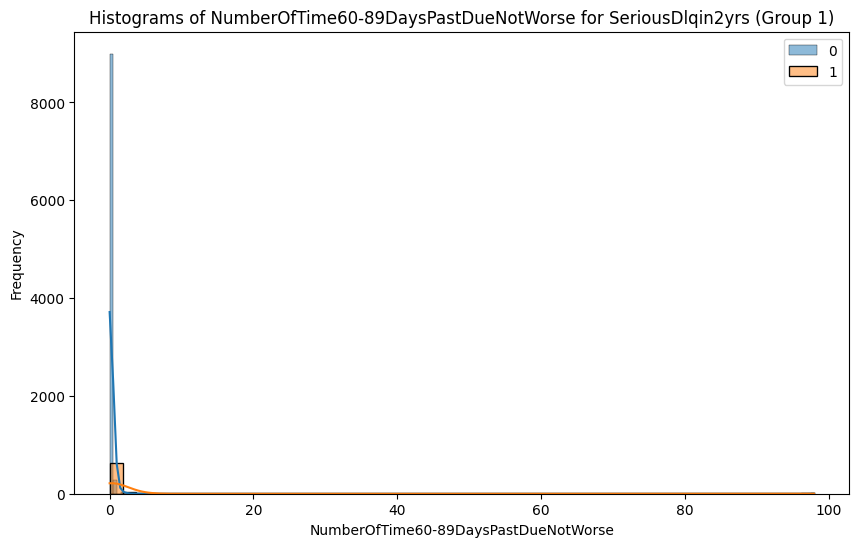

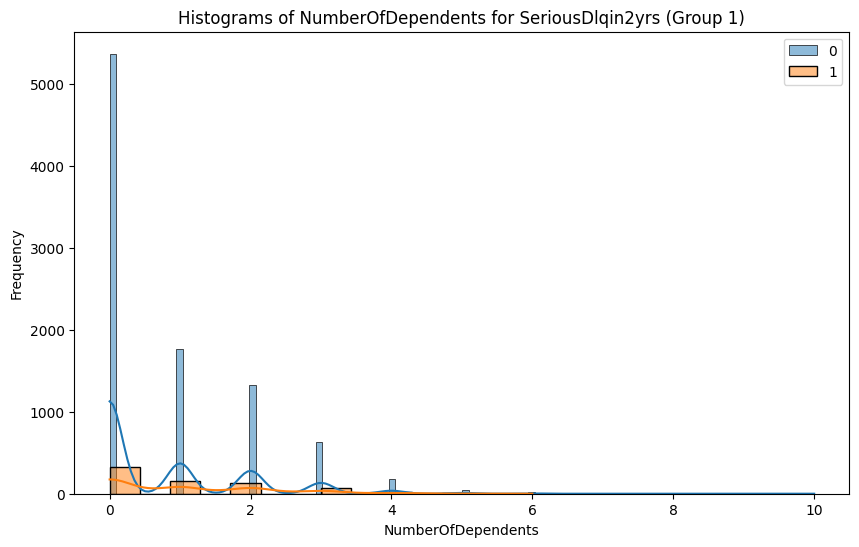

In [37]:
for col in features_num:
    bt.plot_grouped_histograms(X_train_imp_df, cat_col= target, num_col= col, group_size= 3)

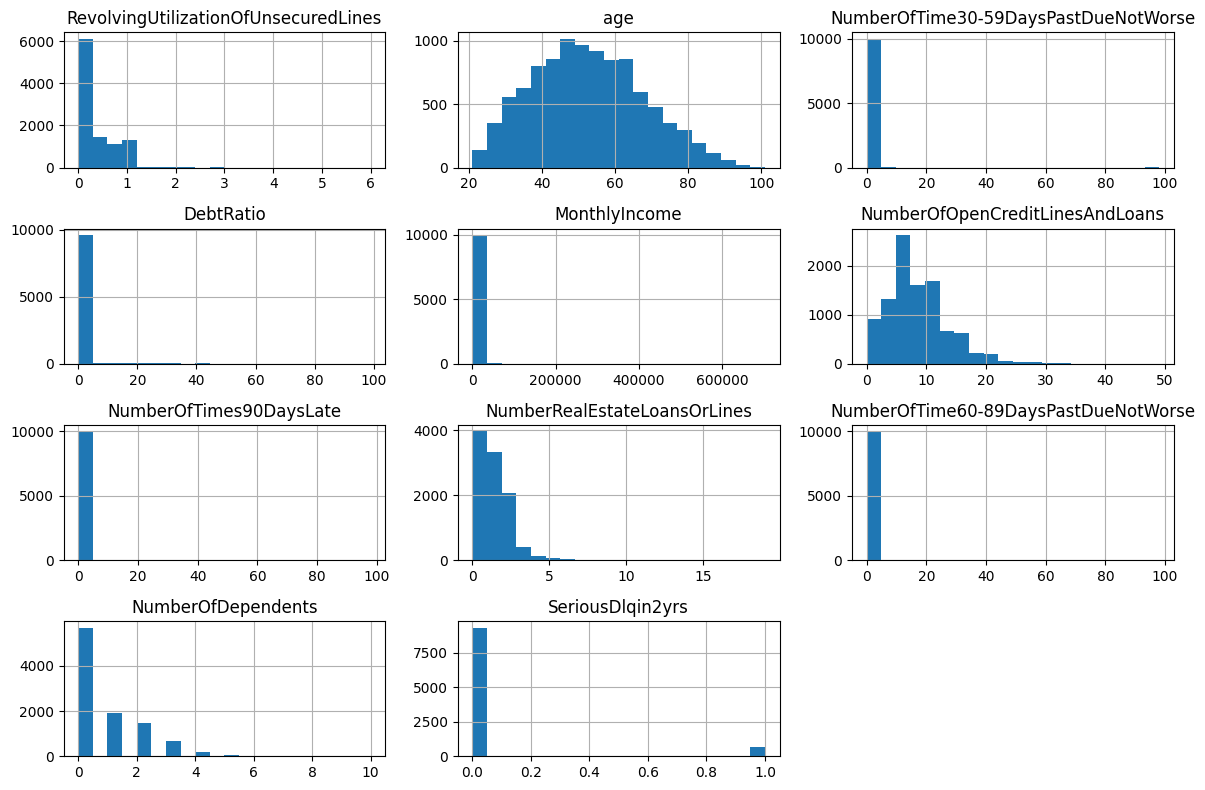

In [43]:
X_train_imp_df.hist(figsize=(12,8), bins=20)
plt.tight_layout()
plt.show()

no será necesario aplicar ninguna tranformación.

#### Elección de modelos

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [44]:
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

log_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(class_weight='balanced', max_iter=1000, random_state= 42))
])

rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)

model_names = ["KNN", "LogisticRegression","Random Forest"]
model_set = [knn_pipe, log_pipe, rf_clf]


#### Comparación de modelos con validación cruzada

In [52]:
from sklearn.model_selection import cross_val_score

metricas_cv = {}
valores = []

for nombre, modelo in zip(model_names, model_set):
    recall = cross_val_score(modelo, X_train_imp, y_train, cv=5, scoring="recall")
    metricas_cv[nombre] = recall
    valores.append(np.mean(recall))
    
    print(f"Modelo: {nombre}")
    print("Scores por fold:", recall)
    print("Recall medio:", np.mean(recall))
    print("-" * 40)

ganador = list(metricas_cv.keys())[np.argmax(valores)]
print(f"\n Modelo ganador según recall: {ganador}")



Modelo: KNN
Scores por fold: [0.10144928 0.10144928 0.07971014 0.12230216 0.07971014]
Recall medio: 0.09692419977061831
----------------------------------------
Modelo: LogisticRegression
Scores por fold: [0.7173913  0.74637681 0.7826087  0.74100719 0.77536232]
Recall medio: 0.7525492649358773
----------------------------------------
Modelo: Random Forest
Scores por fold: [0.11594203 0.11594203 0.13768116 0.10071942 0.18115942]
Recall medio: 0.1302888124283182
----------------------------------------

 Modelo ganador según recall: LogisticRegression


####  Optimización de los hiperparámetros del modelo ganador con (GridSearchCV)

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10],
    'logreg__penalty': ['l2'],
    'logreg__solver': ['lbfgs', 'liblinear']
}

grid = GridSearchCV(
    estimator=log_pipe,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_imp, y_train)

print("Mejores hiperparámetros:", grid.best_params_)
print("Mejor recall en CV:", grid.best_score_)

best_model = grid.best_estimator_


y_train_pred = best_model.predict(X_train_imp)

print("\n Classification Report (Train) \n")
print(classification_report(y_train, y_train_pred))

print("\n Matriz de Confusión (Train) \n")
print(confusion_matrix(y_train, y_train_pred))

Mejores hiperparámetros: {'logreg__C': 0.001, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
Mejor recall en CV: 0.7684704410384735

 Classification Report (Train) 

              precision    recall  f1-score   support

           0       0.98      0.71      0.83      9338
           1       0.17      0.77      0.27       691

    accuracy                           0.72     10029
   macro avg       0.57      0.74      0.55     10029
weighted avg       0.92      0.72      0.79     10029


 Matriz de Confusión (Train) 

[[6672 2666]
 [ 159  532]]


c:\Users\asgr2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


In [66]:
logreg = best_model.named_steps['logreg']

for name, coef in zip(X.columns, logreg.coef_[0]):
    if abs(coef) > 0.1:   # umbral simple para mostrar solo las importantes
        print(name, coef)

RevolvingUtilizationOfUnsecuredLines 0.6333009512253526
age -0.19576282547282833
NumberOfTime30-59DaysPastDueNotWorse 0.16596849132448288
MonthlyIncome -0.1052486872426602
NumberOfTimes90DaysLate 0.13316879161281606


#### Evaluar el modelo optimizado en el conjunto de test

In [55]:
from sklearn.metrics import recall_score, confusion_matrix, classification_report

y_pred = best_model.predict(X_test_imp)

print("Recall en test:", recall_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Recall en test: 0.7398843930635838

Matriz de confusión:
 [[1681  654]
 [  45  128]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.72      0.83      2335
           1       0.16      0.74      0.27       173

    accuracy                           0.72      2508
   macro avg       0.57      0.73      0.55      2508
weighted avg       0.92      0.72      0.79      2508



#### Evaluación de errores

In [56]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("Falsos negativos:", fn)
print("Falsos positivos:", fp)

Falsos negativos: 45
Falsos positivos: 654
